# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Define an empty list to fetch the weather data for each city
city_weather = []
counter = 0 

# # Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# # Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    
    #gets response for each city
    response = requests.get(query_url + city).json()  
    
    #try/except statement to handle errors when city is not found on openweather site
    try:
        
        #create dictionary
        weather_dict = {
            "City": response['name'],
            "Lat": response['coord']['lat'],
            "Lng": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
            "Date": response['dt']
        }
        city_weather.append(weather_dict)
        
        counter = counter + 1
        
        print(f"{counter} City Name: {response['name']} / ID:{response['id']}")
        
 # If an error is experienced, skip the city   
    except:
        
        print("Missing city...skipping | " + city)

    # except:
    #     print("City not found. Skipping...")
    #     pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
# city_data

Beginning Data Retrieval     
-----------------------------
1 City Name: Hawaiian Paradise Park / ID:5855809
2 City Name: Hermanus / ID:3366880
3 City Name: Utrik / ID:7306518
4 City Name: Varberg / ID:2664996
Missing city...skipping | taiohae
5 City Name: Port-aux-Français / ID:1546102
6 City Name: Villa Gesell / ID:3427431
7 City Name: Adamstown / ID:4030723
8 City Name: Puerto Natales / ID:3874958
Missing city...skipping | ouellah
9 City Name: Kashgar / ID:1280849
10 City Name: Kailua-Kona / ID:5847504
11 City Name: Hammerfest / ID:779683
12 City Name: Uttarkāshi / ID:1253628
13 City Name: Shenjiamen / ID:1795632
14 City Name: Hultsfred / ID:2704398
15 City Name: Bocanda / ID:2291383
16 City Name: Anadyr / ID:2127202
17 City Name: Waalre / ID:2745127
18 City Name: Kyzyl-Mazhalyk / ID:1500957
19 City Name: Happy Valley-Goose Bay / ID:5970458
20 City Name: Singaparna / ID:1626936
21 City Name: Talagutong / ID:1714416
22 City Name: Tiksi / ID:2015306
23 City Name: Dudinka / ID:1507116


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_weather)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hawaiian Paradise Park,19.5933,-154.9731,78.31,94,100,9.22,US,1697176900
1,Hermanus,-34.4187,19.2345,57.43,68,1,3.94,ZA,1697176901
2,Utrik,11.2278,169.8474,82.78,77,47,11.23,MH,1697176901
3,Varberg,57.1056,12.2508,53.06,73,55,17.45,SE,1697176901
4,Port-aux-Français,-49.3500,70.2167,37.51,74,88,21.56,TF,1697176901


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/cindy/Desktop/Bootcamp/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("/Users/cindy/Desktop/Bootcamp/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Hawaiian Paradise Park,19.5933,-154.9731,78.31,94,100,9.22,US,1697176900
1,Hermanus,-34.4187,19.2345,57.43,68,1,3.94,ZA,1697176901
2,Utrik,11.2278,169.8474,82.78,77,47,11.23,MH,1697176901
3,Varberg,57.1056,12.2508,53.06,73,55,17.45,SE,1697176901
4,Port-aux-Français,-49.3500,70.2167,37.51,74,88,21.56,TF,1697176901


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

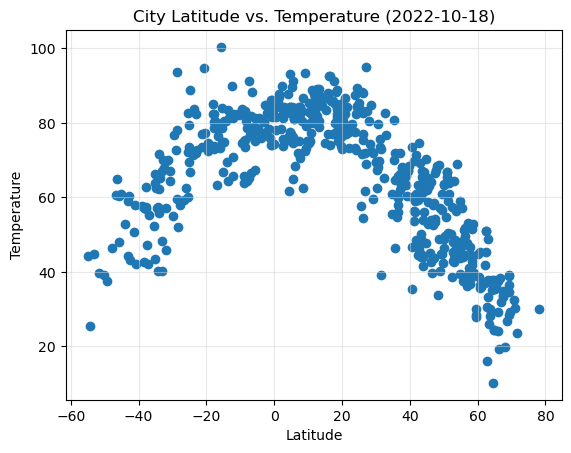

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(color='lightgrey', alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

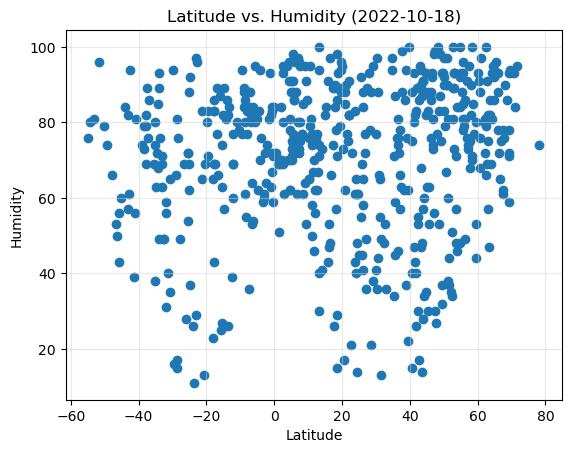

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title(f'Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(color='lightgrey', alpha=0.5)

# Save the figure
plt.savefig("/Users/cindy/Desktop/Bootcamp/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

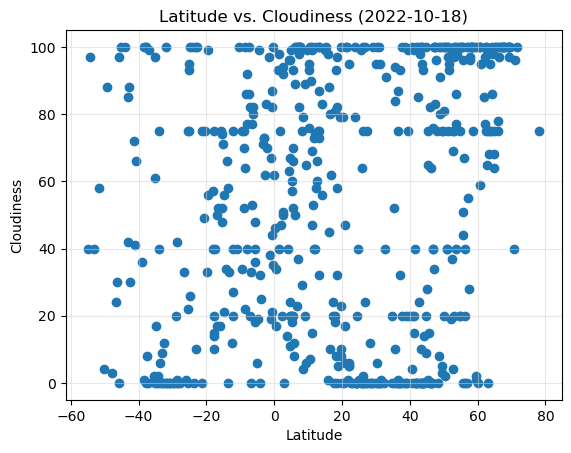

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title(f'Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(color='lightgrey', alpha=0.5)

# Save the figure
plt.savefig("/Users/cindy/Desktop/Bootcamp/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

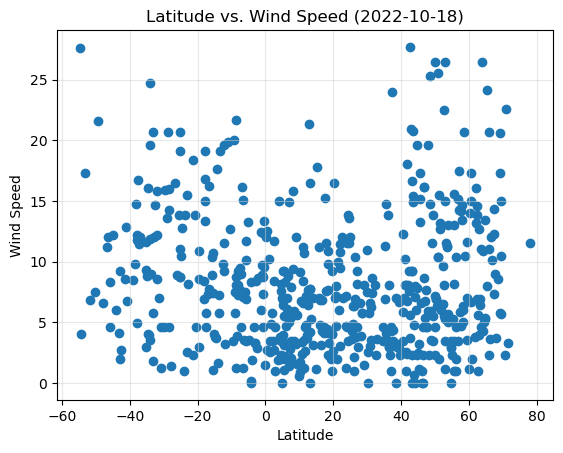

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title(f'Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(color='lightgrey', alpha=0.5)

# Save the figure
plt.savefig("/Users/cindy/Desktop/Bootcamp/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear (x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f'The r-value is: {rvalue}')

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Hawaiian Paradise Park,19.5933,-154.9731,78.31,94,100,9.22,US,1697176900
2,Utrik,11.2278,169.8474,82.78,77,47,11.23,MH,1697176901
3,Varberg,57.1056,12.2508,53.06,73,55,17.45,SE,1697176901
8,Kashgar,39.4547,75.9797,67.21,22,75,6.71,CN,1697176902
9,Kailua-Kona,19.6406,-155.9956,77.50,89,10,4.00,US,1697176902


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df ["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Hermanus,-34.4187,19.2345,57.43,68,1,3.94,ZA,1697176901
4,Port-aux-Français,-49.3500,70.2167,37.51,74,88,21.56,TF,1697176901
5,Villa Gesell,-37.2639,-56.9730,42.22,76,0,11.45,AR,1697176901
6,Adamstown,-25.0660,-130.1015,69.53,69,93,11.07,PN,1697176901
7,Puerto Natales,-51.7236,-72.4875,39.70,96,58,6.82,CL,1697176610


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8799561292766805


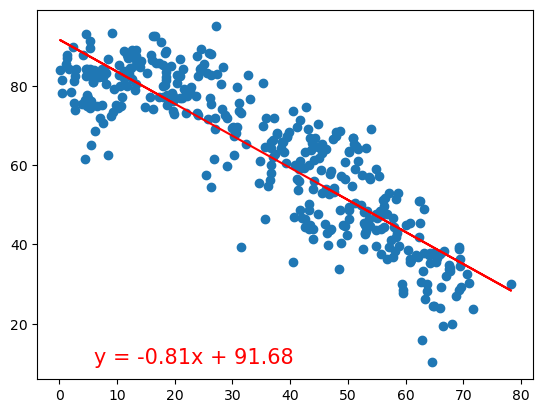

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear(x_values, y_values)

The r-value is: 0.7617902848613703


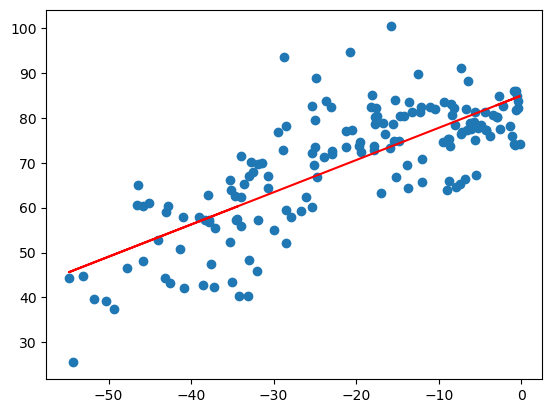

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear(x_values, y_values)

**Discussion about the linear relationship:** From the graph and r-value it can be observed that there is a strong negative correlation between temperature and Northern hemisphere. On the other hand, there is a strong positve correlation between temperature and Southern hemisphere. It can be concluded that there is a strong correlation between temperature and latitude, based on location it can be possibe or negative, the direction of the relation varies. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07252633606519043


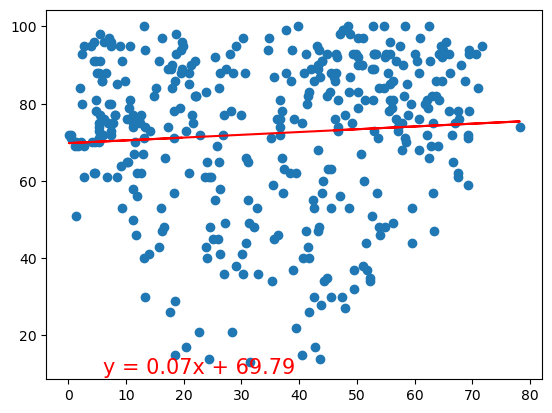

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear(x_values, y_values)

The r-value is: 0.13337113581308666


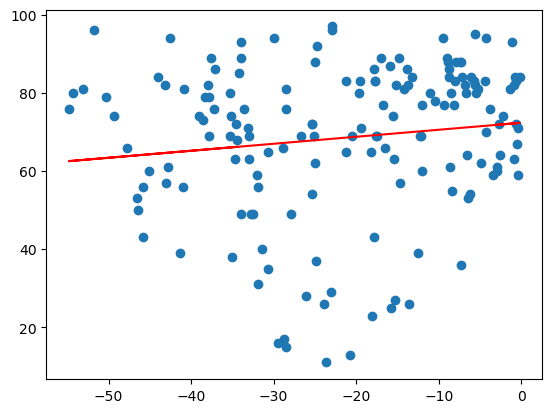

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear(x_values, y_values)

**Discussion about the linear relationship:** From the r-value and regression line, it can be deducted that there is none to a small insignificant positive correlation between humidity and latitude between northern hemisphere and a almost to none correlation between humidity and southern hemisphere. Meaning no relation between hemisphere, location, and humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18846675558561524


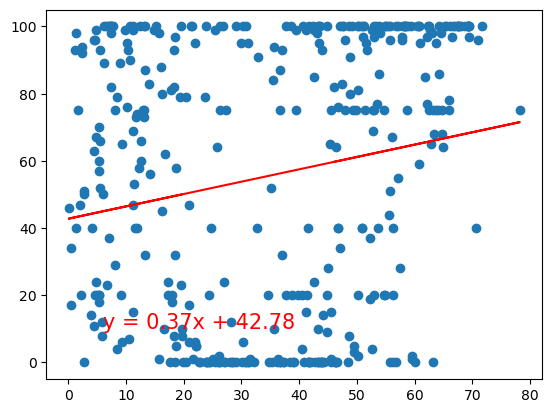

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear(x_values, y_values)


The r-value is: 0.16069278624413183


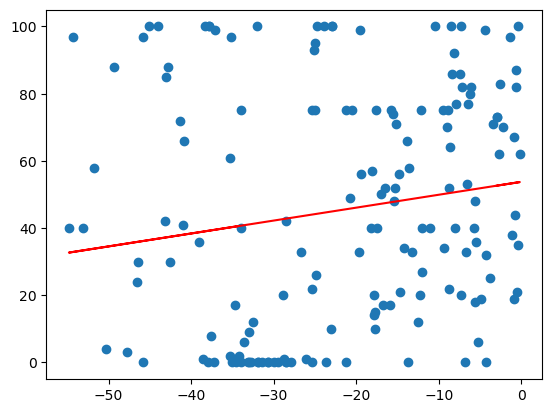

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear(x_values, y_values)

**Discussion about the linear relationship:** From the graph and r-value, it can be observed that there is a small positive correlation between cloudiness and the northern hemismephere. It can also be observed that, there is a small positive correlation between cloudiness and the southern hemisphere. Based on that, it can be concluded that there is very small and insignificant positive correlation between cloudiness and location. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.25689858122518305


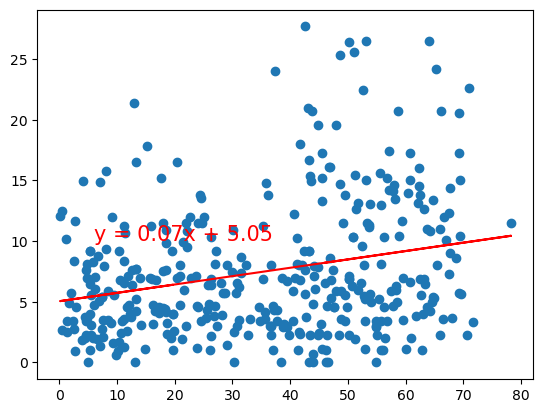

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear(x_values, y_values)

The r-value is: -0.18726279848424188


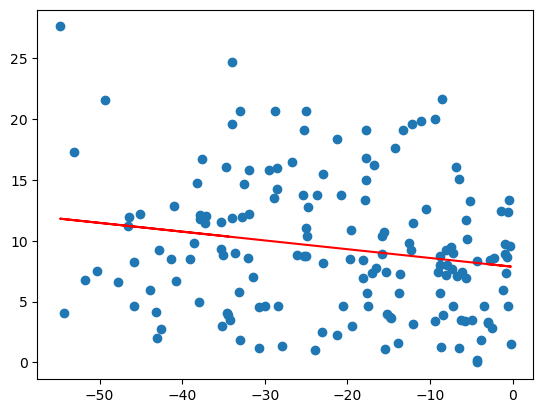

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear(x_values, y_values)

**Discussion about the linear relationship:** Based on the graph and r-value, it can be observed that there is a small positive relation between wind speed and northern hemisphere. On the other hand, it can be observed that there is a small negative relation between wind speed and southern hemisphere. It can be concluded that there is a small, insignificant correlation between wind and latitude, but depending on the latitude, the direction of the relation varies. 